# Imports

In [1]:
from datetime import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings 
warnings.filterwarnings('ignore')

# Create UserGenerator instance

In [2]:
from synabon.users import UserGenerator

In [3]:
from functools import partial

n_users = 1000
start_dt = datetime.strptime("2023/01/01", "%Y/%m/%d")
end_dt = datetime.strptime("2023/02/01", "%Y/%m/%d")

start_balance_generator = partial(np.random.exponential, scale=100)
end_balance_generator = partial(np.random.exponential, scale=200)
n_interactions_generator = partial(np.random.poisson, lam=10)

In [4]:
ug = UserGenerator(
    n_users,
    n_countries=5,
    p_countries=[0.1, 0.2, 0.3, 0.35, 0.05]
)

In [5]:
df = ug.get_data(
    start_balance_generator,
    end_balance_generator,
    n_interactions_generator,
    start_dt, 
    end_dt
)

In [6]:
df.head(10)

,user_id,user_balance,interaction_sum,interaction_type,transaction_commission,country,device,date
0,69e48242-761e-42b2-9d6b-a2825df06d8d,664.172466,NaN,registration,NaN,New Caledonia,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_5 ...,2023-01-01
1,ace453b7-53de-4b16-b41d-0321261b9960,80.070699,NaN,registration,NaN,Cyprus,Mozilla/5.0 (Windows 95; ro-RO; rv:1.9.1.20) G...,2023-01-01
2,1eadd80e-c024-402b-a281-6deb30888c3b,5.592719,NaN,registration,NaN,New Caledonia,Mozilla/5.0 (Macintosh; PPC Mac OS X 10_6_2; r...,2023-01-01
3,63be7a34-4852-4e89-8d56-ec20b1200b61,130.132465,NaN,registration,NaN,New Caledonia,Mozilla/5.0 (compatible; MSIE 5.0; Windows NT ...,2023-01-01
4,01b4678f-546f-4670-abb1-617124a8f0f4,95.453057,NaN,registration,NaN,Central African Republic,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_7_9;...,2023-01-01
5,91690a79-2137-4ed6-90c1-da14d3b8a0c2,10.644458,NaN,registration,NaN,Cyprus,Mozilla/5.0 (X11; Linux i686; rv:1.9.5.20) Gec...,2023-01-01
6,09e661eb-488b-43cf-919d-507d8fa11a29,35.046297,NaN,registration,NaN,New Caledonia,Mozilla/5.0 (compatible; MSIE 7.0; Windows NT ...,2023-01-01
7,3b0c78af-737c-4f81-840c-6c95e6c85a5d,15.053145,NaN,registration,NaN,Cyprus,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,2023-01-01
8,1b928547-e936-496d-9e06-cb6013beb1ad,37.279336,NaN,registration,NaN,Central African Republic,Opera/9.26.(X11; Linux i686; raj-IN) Presto/2....,2023-01-01
9,725f4aad-9d46-4335-8e08-690ee99f130a,98.652608,NaN,registration,NaN,Cyprus,Opera/9.58.(X11; Linux x86_64; sa-IN) Presto/2...,2023-01-01


In [7]:
df.shape

(10960, 8)

In [8]:
df["user_id"].nunique()

1000

# Let's see the distribution of balances at the start

In [9]:
mask = df["interaction_type"] == "registration"
df_start = df[mask]
df_start.shape

(1000, 8)

<Axes: xlabel='user_balance', ylabel='Count'>

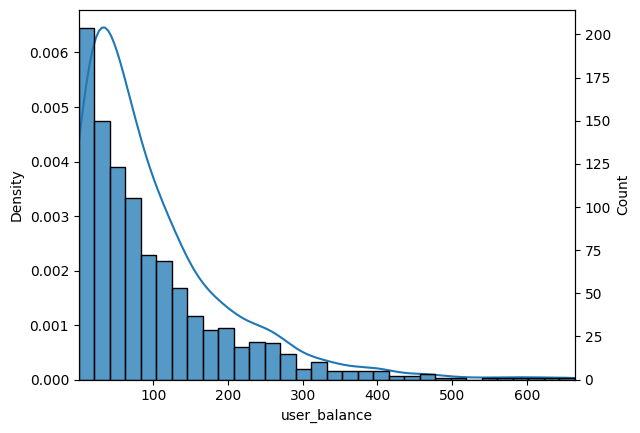

In [10]:
fig, ax1 = plt.subplots()
sns.kdeplot(data=df_start, x="user_balance", ax=ax1)
ax1.set_xlim((df_start["user_balance"].min(), df_start["user_balance"].max()))
ax2 = ax1.twinx()
sns.histplot(data=df_start, x="user_balance", ax=ax2)

In [11]:
np.mean(df_start["user_balance"])

98.15900972369194

# Let's see how the balances of some users changed

In [12]:
user_ids = np.random.choice(df["user_id"].unique(), size=3)
mask = (df["user_id"].isin(user_ids))
user_df = df[mask]
user_df.head(5)

,user_id,user_balance,interaction_sum,interaction_type,transaction_commission,country,device,date
165,568edfa4-7b9e-47c5-b5db-54ac64c5e12b,52.155912,NaN,registration,NaN,New Caledonia,Mozilla/5.0 (X11; Linux i686; rv:1.9.5.20) Gec...,2023-01-01 00:00:00
383,01a7d14d-8266-4f6f-932f-a9dd240426e8,30.163807,NaN,registration,NaN,Moldova,Mozilla/5.0 (iPod; U; CPU iPhone OS 4_2 like M...,2023-01-01 00:00:00
843,3e43e197-f091-4e8b-b1cd-99594eb0bb99,86.212014,NaN,registration,NaN,Chile,Mozilla/5.0 (Windows; U; Windows 98) AppleWebK...,2023-01-01 00:00:00
1476,01a7d14d-8266-4f6f-932f-a9dd240426e8,272.541775,242.377969,transaction,0.727134,Moldova,Mozilla/5.0 (iPod; U; CPU iPhone OS 4_2 like M...,2023-01-03 01:08:24
2011,3e43e197-f091-4e8b-b1cd-99594eb0bb99,399.284380,313.072365,transaction,0.939217,Chile,Mozilla/5.0 (Windows; U; Windows 98) AppleWebK...,2023-01-04 05:21:49


In [13]:
user_df.shape

(31, 8)

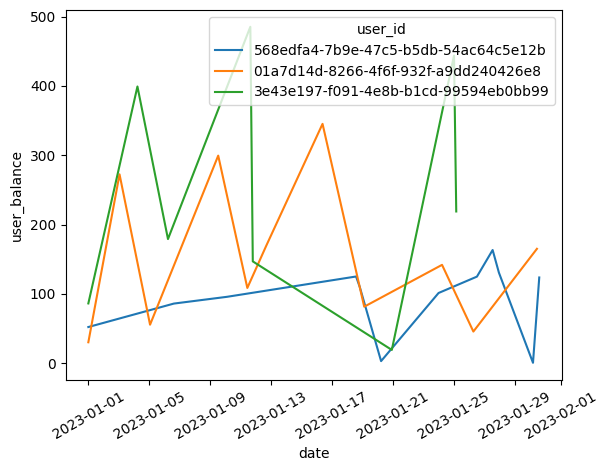

In [14]:
g = sns.lineplot(x="date", y="user_balance", hue="user_id", data=user_df)
tmp = g.set_xticklabels(g.get_xticklabels(), rotation=30)

# Let's look at the distribution of balances at the end

In [15]:
df_last = df.sort_values(by="date").groupby(by="user_id").tail(1)

In [16]:
df_last.head()

,user_id,user_balance,interaction_sum,interaction_type,transaction_commission,country,device,date
5223,9f68f24c-d38a-4e41-94c7-9fa899aac9b1,55.454772,38.780550,transaction,0.116342,Cyprus,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,2023-01-13 11:17:09
5247,038f5d33-9b79-41e7-870a-d753911e871d,389.110064,-34.271548,transaction,0.102815,Cyprus,Opera/9.55.(X11; Linux i686; mag-IN) Presto/2....,2023-01-13 12:22:55
5280,d9f796e4-95d7-4bfa-bafc-384a21d3c7c1,19.031800,-118.264861,transaction,0.354795,New Caledonia,Mozilla/5.0 (compatible; MSIE 6.0; Windows NT ...,2023-01-13 13:48:44
5295,76b691a5-0c48-422c-813c-509820c525e8,304.134611,-55.379003,transaction,0.166137,Cyprus,Mozilla/5.0 (X11; Linux i686) AppleWebKit/533....,2023-01-13 14:14:42
5586,f3a41244-6f59-42b9-9f88-169a768d0aee,76.256030,49.909873,transaction,0.149730,New Caledonia,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,2023-01-16 05:18:37


In [17]:
df_last.shape

(1000, 8)

<Axes: xlabel='user_balance', ylabel='Count'>

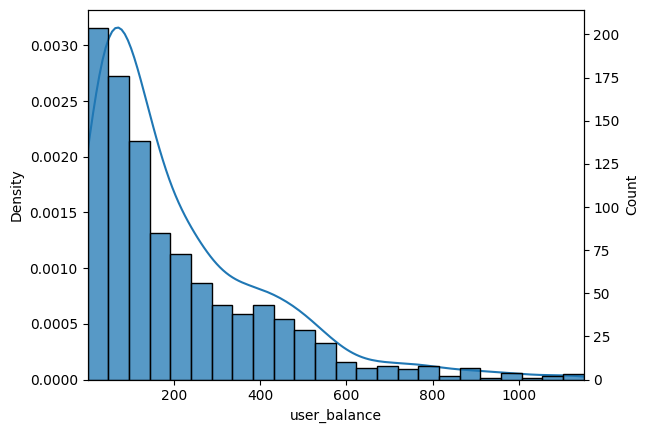

In [18]:
fig, ax1 = plt.subplots()
sns.kdeplot(data=df_last, x="user_balance", ax=ax1)
ax1.set_xlim((df_last["user_balance"].min(), df_last["user_balance"].max()))
ax2 = ax1.twinx()
sns.histplot(data=df_last, x="user_balance", ax=ax2)

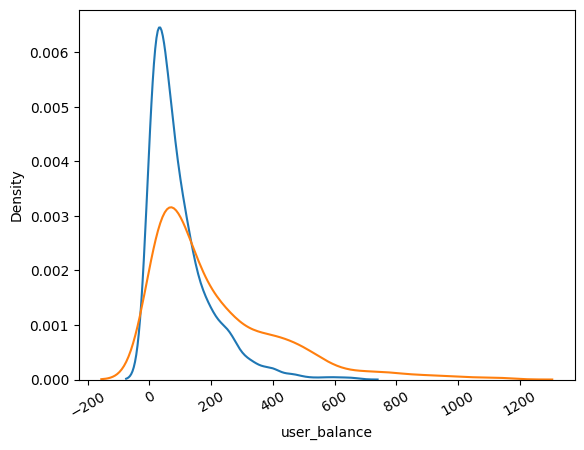

In [19]:
g = sns.kdeplot(x="user_balance", data=df_start)
g = sns.kdeplot(x="user_balance", data=df_last)
tmp = g.set_xticklabels(g.get_xticklabels(), rotation=30)

In [20]:
print(f"MEAN Before: {np.mean(df_start['user_balance'])}")
print(f"MEAN After: {np.mean(df_last['user_balance'])}")


MEAN Before: 98.15900972369194
MEAN After: 210.26519558375492


# Let's look at the behavior of commission

In [21]:
mask = df["interaction_type"] != "registration"
df_commission = df[mask]
df_commission["cumsum"] = df_commission["transaction_commission"].cumsum()


In [22]:
df_commission.head()

,user_id,user_balance,interaction_sum,interaction_type,transaction_commission,country,device,date,cumsum
1000,43af9b5d-9fba-4a7f-8f3d-1cc697df643d,11.600246,-185.747765,transaction,0.557243,Chile,Mozilla/5.0 (compatible; MSIE 6.0; Windows 95;...,2023-01-02 00:01:06,0.557243
1001,3e66a7b8-04e6-4fa4-b47b-a4b515f3f9d6,182.698402,57.023950,transaction,0.171072,Cyprus,Mozilla/5.0 (Android 4.1.1; Mobile; rv:25.0) G...,2023-01-02 00:01:34,0.728315
1002,ca4591ab-5e3a-4d90-9a34-ae0de5a7f465,718.015664,642.771636,transaction,1.928315,New Caledonia,Opera/9.99.(X11; Linux i686; bg-BG) Presto/2.9...,2023-01-02 00:07:31,2.656630
1003,e1bdc117-1fa8-44e5-b094-166a5cf723f4,12.386222,-60.204531,transaction,0.180614,Moldova,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,2023-01-02 00:13:42,2.837244
1004,6baff4b7-c485-475d-83fa-5b1320335fa0,31.207732,22.611563,transaction,0.067835,Cyprus,Mozilla/5.0 (compatible; MSIE 7.0; Windows NT ...,2023-01-02 00:15:01,2.905078


In [23]:
df_commission.tail()

,user_id,user_balance,interaction_sum,interaction_type,transaction_commission,country,device,date,cumsum
10955,368af3c9-1d11-4be5-9ce5-93d79484ce9a,1077.088959,-716.620195,transaction,2.149861,Cyprus,Opera/9.38.(Windows NT 5.2; kl-GL) Presto/2.9....,2023-01-31 23:39:13,4914.903420
10956,9d52d132-a94e-44cc-82a3-ca4eaf58f0a8,31.395736,12.532086,transaction,0.037596,New Caledonia,Mozilla/5.0 (X11; Linux x86_64; rv:1.9.7.20) G...,2023-01-31 23:41:41,4914.941016
10957,0301c3a7-3cbb-434c-9ad3-bbbd24630f4b,764.044073,-86.356441,transaction,0.259069,Cyprus,Mozilla/5.0 (Macintosh; PPC Mac OS X 10_10_2 r...,2023-01-31 23:42:06,4915.200085
10958,a436a136-331f-4baa-9f3a-5abf52a5271d,100.950430,-17.305926,transaction,0.051918,Cyprus,Mozilla/5.0 (Android 2.3.2; Mobile; rv:21.0) G...,2023-01-31 23:44:53,4915.252003
10959,af0e5f56-49d0-4ba0-97ee-cce1c07bf84d,503.564222,-43.760918,transaction,0.131283,Cyprus,Mozilla/5.0 (Macintosh; U; Intel Mac OS X 10_5...,2023-01-31 23:54:52,4915.383286


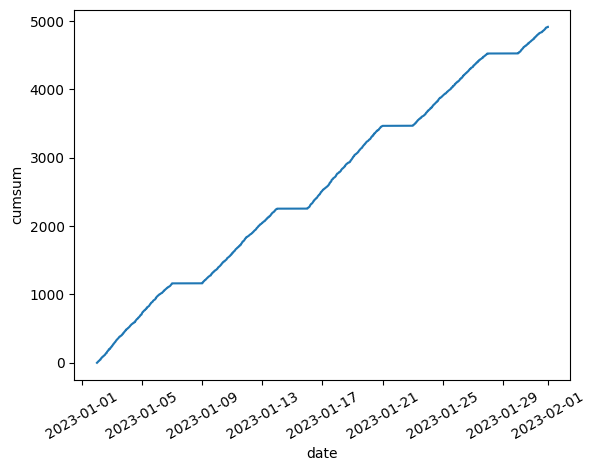

In [24]:
# в промежутки времени когда cumsum=const наступили выходные. Нет транзакций - нет коммиссии.
g = sns.lineplot(x="date", y="cumsum", data=df_commission)
tmp = g.set_xticklabels(g.get_xticklabels(), rotation=30)

# Let's look at the distribution of the number of interactions

In [25]:
mask = df["interaction_type"] != "registration"
df_inter = df[mask]
df_inter["trunc_date"] = df_inter["date"].dt.strftime("%Y/%m/%d")
df_day = df_inter.groupby("user_id").size().reset_index(name="count_transactions")
df_day.head()

,user_id,count_transactions
0,0007631f-6666-4683-83d8-687c554ffbbd,11
1,0072864b-134c-4d25-930d-d3d7c8b0b82f,10
2,00c66a97-7e2c-4179-964a-7c10dd1df166,19
3,0132b3ac-6da6-4142-808c-bdf12ef0cd57,14
4,01592c29-182b-4d0f-b2c5-b45027f914ec,5


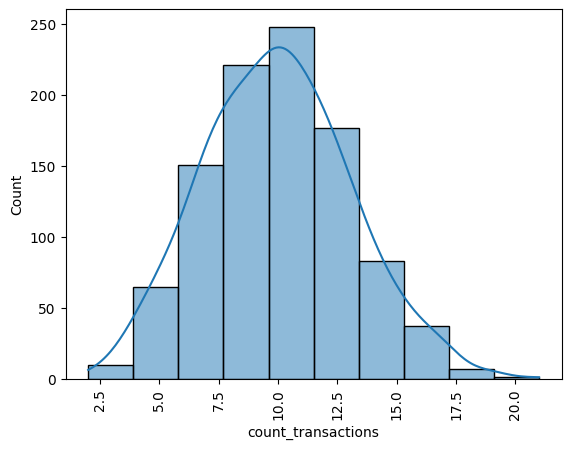

In [26]:
g = sns.histplot(x="count_transactions", data=df_day, bins=10, kde=True)
tmp = g.set_xticklabels(g.get_xticklabels(), rotation=90)

# Let's look at the distribution of countries

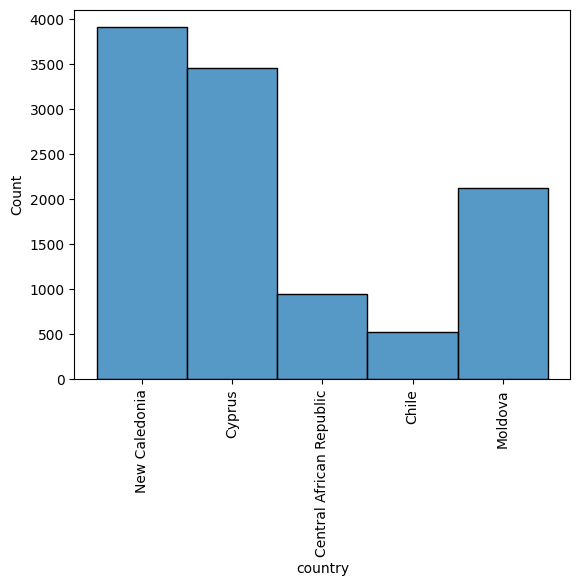

In [27]:
g = sns.histplot(x="country", data=df)
tmp = g.set_xticklabels(g.get_xticklabels(), rotation=90)

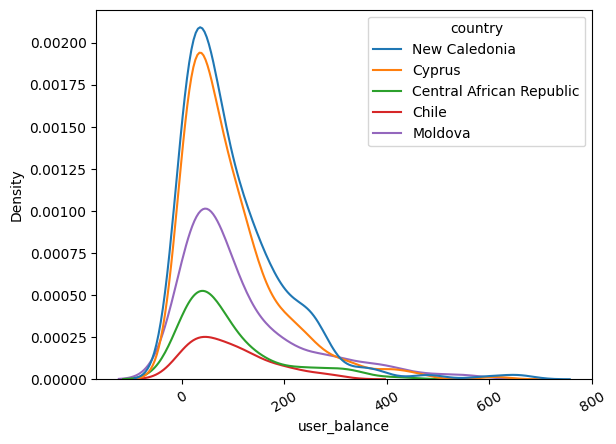

In [28]:
g = sns.kdeplot(x="user_balance", data=df_start, hue="country")
tmp = g.set_xticklabels(g.get_xticklabels(), rotation=30)

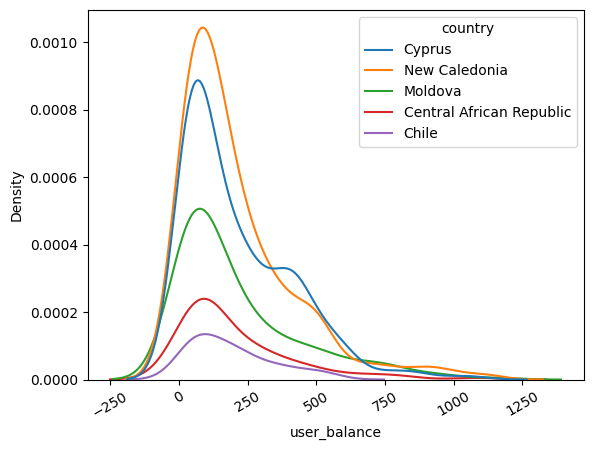

In [29]:
g = sns.kdeplot(x="user_balance", data=df_last, hue="country")
tmp = g.set_xticklabels(g.get_xticklabels(), rotation=30)

# Calculate some metric

In [30]:
def calc_money_per_interaction(group) -> float:
    group["target"] = np.mean(group["interaction_sum"])
    return group

In [31]:
mask = df["interaction_type"] != "registration"

users_df = df[mask].groupby("user_id").apply(calc_money_per_interaction).reset_index(drop=True)

users_df.head()

,user_id,user_balance,interaction_sum,interaction_type,transaction_commission,country,device,date,target
0,0007631f-6666-4683-83d8-687c554ffbbd,295.996614,292.706446,transaction,0.878119,Moldova,Mozilla/5.0 (Linux; Android 11) AppleWebKit/53...,2023-01-03 00:11:02,11.437898
1,0007631f-6666-4683-83d8-687c554ffbbd,332.029512,36.032898,transaction,0.108099,Moldova,Mozilla/5.0 (Linux; Android 11) AppleWebKit/53...,2023-01-09 05:01:15,11.437898
2,0007631f-6666-4683-83d8-687c554ffbbd,8.395523,-323.633989,transaction,0.970902,Moldova,Mozilla/5.0 (Linux; Android 11) AppleWebKit/53...,2023-01-10 08:07:09,11.437898
3,0007631f-6666-4683-83d8-687c554ffbbd,13.921809,5.526287,transaction,0.016579,Moldova,Mozilla/5.0 (Linux; Android 11) AppleWebKit/53...,2023-01-10 11:41:13,11.437898
4,0007631f-6666-4683-83d8-687c554ffbbd,184.898585,170.976775,transaction,0.512930,Moldova,Mozilla/5.0 (Linux; Android 11) AppleWebKit/53...,2023-01-16 02:41:57,11.437898


In [32]:
users_df = (
    users_df
    .groupby("user_id")
    .agg(
        {
            "country": np.max,
            "device": np.max,
            "target": np.mean,
        }
    )
    .reset_index()
)
users_df.head()

,user_id,country,device,target
0,0007631f-6666-4683-83d8-687c554ffbbd,Moldova,Mozilla/5.0 (Linux; Android 11) AppleWebKit/53...,11.437898
1,0072864b-134c-4d25-930d-d3d7c8b0b82f,New Caledonia,Mozilla/5.0 (compatible; MSIE 9.0; Windows 95;...,8.231014
2,00c66a97-7e2c-4179-964a-7c10dd1df166,New Caledonia,Opera/9.77.(X11; Linux x86_64; az-IN) Presto/2...,-12.629564
3,0132b3ac-6da6-4142-808c-bdf12ef0cd57,Cyprus,Mozilla/5.0 (iPod; U; CPU iPhone OS 3_2 like M...,41.045004
4,01592c29-182b-4d0f-b2c5-b45027f914ec,Central African Republic,Opera/8.66.(X11; Linux x86_64; gl-ES) Presto/2...,152.124772


# Split into groups

In [33]:
from synabon.split import random_split

In [34]:
control_df, treatment_df = random_split(users_df, "user_id")

In [35]:
control_df.head()

,user_id,country,device,target
0,ed04f363-5acf-4f56-8d0a-2c7c468edb13,Chile,Mozilla/5.0 (Macintosh; PPC Mac OS X 10_5_7) A...,14.801754
1,846ec5a6-6c1f-4ec9-898e-c32615b41406,Cyprus,Mozilla/5.0 (compatible; MSIE 7.0; Windows NT ...,-10.484099
2,fb3459c9-ea34-4457-9883-e811e7fa28fa,New Caledonia,Mozilla/5.0 (iPhone; CPU iPhone OS 5_1_1 like ...,4.850256
3,15281e86-9c7d-4241-8232-2689cd88f8b9,Central African Republic,Mozilla/5.0 (Linux; Android 3.2.6) AppleWebKit...,8.877326
4,98b943d8-2fd6-4e68-8e3c-5f9fa2ee6cf1,Cyprus,Mozilla/5.0 (compatible; MSIE 5.0; Windows 95;...,28.487059


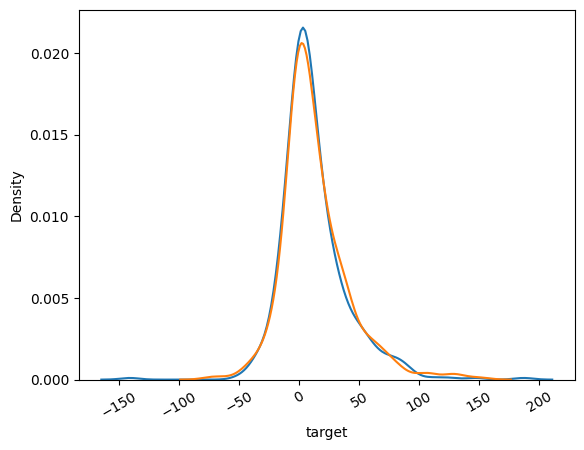

In [36]:
g = sns.kdeplot(x="target", data=control_df)
g = sns.kdeplot(x="target", data=treatment_df)
tmp = g.set_xticklabels(g.get_xticklabels(), rotation=30)

# Add experiment data from UserGenerator class

In [37]:
from datetime import timedelta

control_end_balance_generator = partial(np.random.exponential, scale=500)
control_n_interactions_generator = partial(np.random.poisson, lam=10)

treatment_end_balance_generator = partial(np.random.exponential, scale=600)
treatment_n_interactions_generator = partial(np.random.poisson, lam=10)

duration = timedelta(days=30)

In [38]:
control_idxs = control_df["user_id"].unique()
treatment_idxs = treatment_df["user_id"].unique()

### Исторические данные групп

In [39]:
control_history = df.set_index("user_id").loc[control_idxs].reset_index()
treatment_history = df.set_index("user_id").loc[treatment_idxs].reset_index()

### История + время эксперимента

In [40]:
control_new_df = ug.append_data(control_history, control_end_balance_generator, control_n_interactions_generator, duration)
treatment_new_df = ug.append_data(treatment_history, treatment_end_balance_generator, treatment_n_interactions_generator, duration)

### Берем только срез эксперимента

In [41]:
mask = control_new_df["date"] > control_history["date"].max()
control_experiment = control_new_df[mask]

mask = treatment_new_df["date"] > treatment_history["date"].max()
treatment_experiment = treatment_new_df[mask]

In [42]:
control_target = control_experiment.groupby("user_id").apply(calc_money_per_interaction).reset_index(drop=True)
treatment_target = treatment_experiment.groupby("user_id").apply(calc_money_per_interaction).reset_index(drop=True)


In [43]:
control_target = (
    control_target
    .groupby("user_id")
    .agg(
        {
            "country": np.max,
            "device": np.max,
            "target": np.mean,
        }
    )
    .reset_index()
)
control_target.head()

,user_id,country,device,target
0,0007631f-6666-4683-83d8-687c554ffbbd,Moldova,Mozilla/5.0 (Linux; Android 11) AppleWebKit/53...,-0.647883
1,01b4678f-546f-4670-abb1-617124a8f0f4,Central African Republic,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_7_9;...,-39.805920
2,01da4184-10c1-4cb7-8620-9465ec40b84a,Cyprus,Mozilla/5.0 (compatible; MSIE 7.0; Windows NT ...,15.714992
3,02a6bea9-7840-4c44-b859-5e6e65d25a1c,Cyprus,Opera/8.40.(X11; Linux x86_64; mni-IN) Presto/...,68.449923
4,02d8622e-04b8-4c35-b206-4fcc27371f18,New Caledonia,Opera/9.30.(X11; Linux i686; sid-ET) Presto/2....,140.419567


In [44]:
treatment_target = (
    treatment_target
    .groupby("user_id")
    .agg(
        {
            "country": np.max,
            "device": np.max,
            "target": np.mean,
        }
    )
    .reset_index()
)
treatment_target.head()

,user_id,country,device,target
0,0072864b-134c-4d25-930d-d3d7c8b0b82f,New Caledonia,Mozilla/5.0 (compatible; MSIE 9.0; Windows 95;...,170.114335
1,00c66a97-7e2c-4179-964a-7c10dd1df166,New Caledonia,Opera/9.77.(X11; Linux x86_64; az-IN) Presto/2...,22.394831
2,0132b3ac-6da6-4142-808c-bdf12ef0cd57,Cyprus,Mozilla/5.0 (iPod; U; CPU iPhone OS 3_2 like M...,-6.175826
3,01592c29-182b-4d0f-b2c5-b45027f914ec,Central African Republic,Opera/8.66.(X11; Linux x86_64; gl-ES) Presto/2...,215.248882
4,01a562d8-ebc2-4218-ae19-9de35ef958da,Cyprus,Opera/8.44.(Windows NT 5.01; li-NL) Presto/2.9...,-9.144081


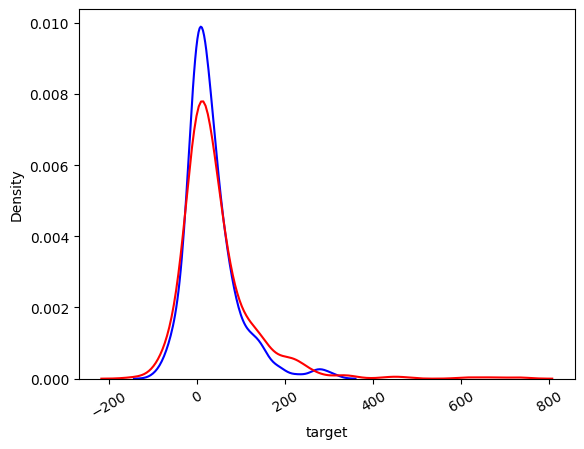

In [45]:
g = sns.kdeplot(x="target", data=control_target, color="b")
g = sns.kdeplot(x="target", data=treatment_target, color="r")
tmp = g.set_xticklabels(g.get_xticklabels(), rotation=30)

In [46]:
print(f"control mean: {control_target['target'].mean()}")
print(f"treatment mean: {treatment_target['target'].mean()}")

control mean: 31.829615294911797
treatment mean: 43.9214654789817


# Theoretical tools

In [47]:
from synabon.theoretical_tools import get_minimal_determinable_effect

In [48]:
get_minimal_determinable_effect(
    users_df, 
    "target",
)

0.3944602273297689

In [49]:
from synabon.theoretical_tools import get_sample_size

In [50]:
get_sample_size(
    users_df,
    "target",
    0.46,
)

268